# Data Augmentation

This step will apply random transforms to the images in the firebreak image dataset. The augmentation starts with the Wildland and Water images to create a dataset of images to evaluate the performance of the Wildland/Water ML model.

All these examples are taken from the fastai V2 Vision documentation: https://docs.fast.ai/vision.augment.html

Some examples adapted from fastai V1 code here: https://towardsdatascience.com/data-augmentations-in-fastai-84979bbcefaa

In [1]:
#import fastai; fastai.__version__

In [2]:
from fastai.vision.all import *
from fastai.vision import *

### Enable Transforms

Transforms are passed on when creating the "ImageDataBunch" objects.

Genearlly, you may enable the "Default" transforms by calling `tfms = get_transforms()`

In [3]:
tfms = aug_transforms()
type(tfms)

list

In [4]:
len(tfms)

2

Define image locations for augmentation with transforms.

In [5]:
path          = r'D:\Projects\WORKING\ML\imagery\Water_Wildland'
path_wildland = f'{path}\Wildland'
path_water    = f'{path}\Water'

outpath        = r'D:\Projects\WORKING\ML\imagery\random_augment'
opath_wildland = f'{outpath}\wildland'
opath_water    = f'{outpath}\water'

opath_water

'D:\\Projects\\WORKING\\ML\\imagery\\random_augment\\water'

Choose an example image for testing the various transformation options.

Define a function for displaying the transformation changes `plots_f()`.

In [6]:
def get_tile(): return load_image(f'{path_wildland}\\6057.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_tile().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

## Augmentations

First, load the image and display what the original tile looks like.

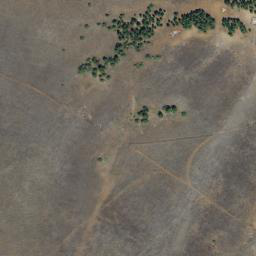

In [7]:
img = load_image(f'{path_wildland}\\6057.jpg')
img

View image statistics for original image as a baseline. JPG image from service is a single band image.

In [8]:
img.shape, img.size

((256, 256), (256, 256))

### CropPad

Center crop and pad an image to size dimensions. Display the results in 1 row of 4 images.

(100, 100)
(200, 200)
(300, 300)
(500, 500)
(700, 700)


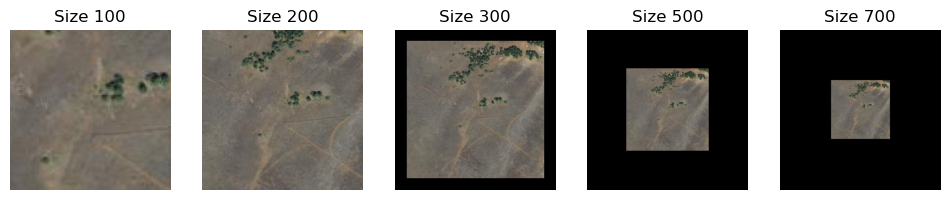

In [9]:
_,axs = plt.subplots(1,5,figsize=(12,4))

for ax,sz in zip(axs.flatten(), [100, 200, 300, 500, 700]):
    show_image(img.crop_pad(sz), ctx=ax, title=f'Size {sz}');
    print(img.crop_pad(sz).shape)

### RandomCrop

Randomly crop an image to size with crop size 200px. Display the result in 1 row of 3 images. 

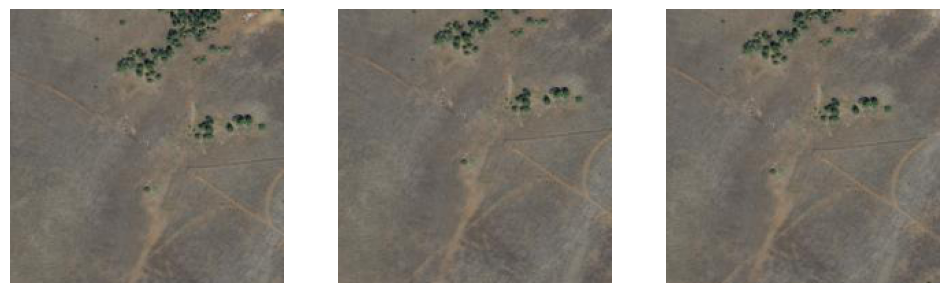

In [10]:
_,axs = plt.subplots(1,3,figsize=(12,4))
f = RandomCrop(200)
for ax in axs: show_image(f(img), ctx=ax);

Randomly crop an image to size with crop size 700px. Display the result in 1 row of 3 images. The black edges are visible.

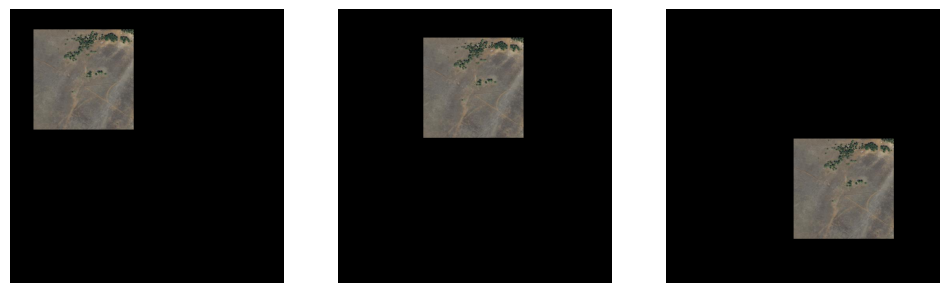

In [11]:
_,axs = plt.subplots(1,3,figsize=(12,4))
f = RandomCrop(700)
for ax in axs: show_image(f(img), ctx=ax);

### RandomResizedCrop()

"The crop picked as a random scale in range `(min_scale,max_scale)` and `ratio` in the range passed, then the resize is done with `resamples[0]` for images and `resamples[1]` for segmentation masks. On the validation set, we center crop the image if it’s ratio isn’t in the range (to the minmum or maximum value) then resize."

There is no black padding in the method. Display results in 3 rows of 3 pictures.

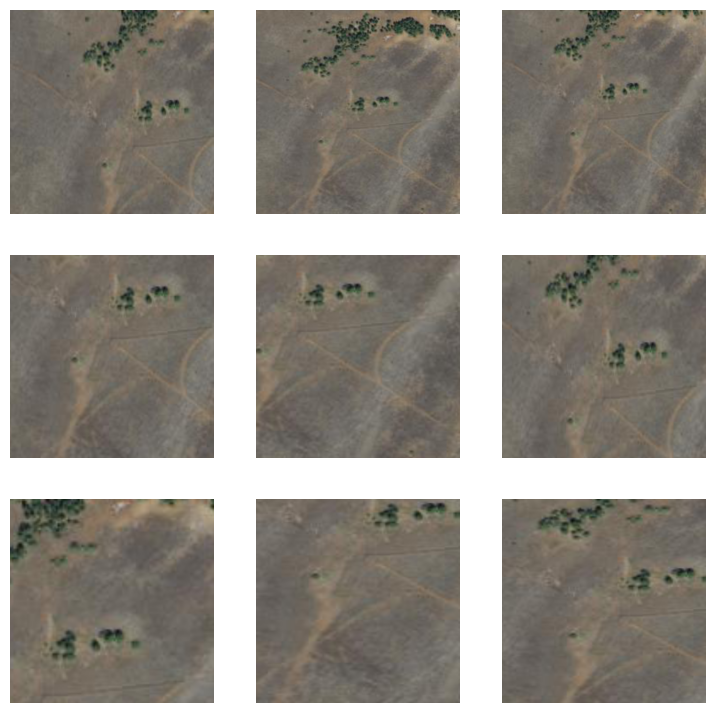

In [12]:
crop  = RandomResizedCrop(700)
_,axs = plt.subplots(3,3,figsize=(9,9))
for ax in axs.flatten():
    cropped = crop(img)
    show_image(cropped, ctx=ax);
    

By setting `max_scale` to lower values, one can enforce small crops. The min and max are in relation to image area.

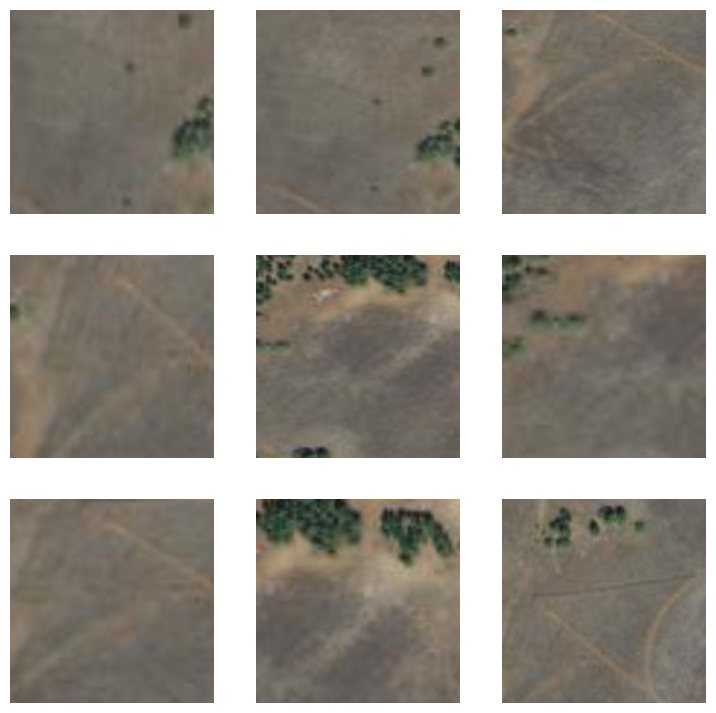

In [13]:
small_crop = RandomResizedCrop(256, min_scale=0.05, max_scale=0.15)
_,axs = plt.subplots(3,3,figsize=(9,9))
for ax in axs.flatten():
    cropped = small_crop(img)
    show_image(cropped, ctx=ax);

### Flip()

Experiments and examples of flipping the image different ways.

PyTorch `torch.permute()` rearranges the original tensor according to the desired ordering and returns a new multidimensional rotated tensor. The size of the returned tensor remains the same as that of the original.

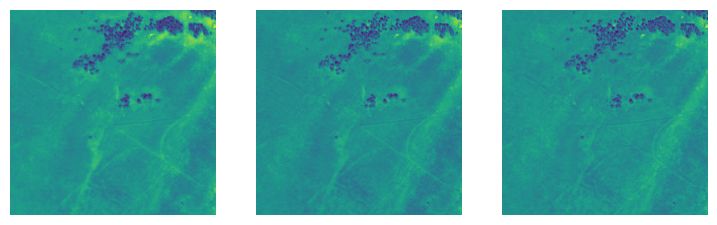

In [14]:
timg = TensorImage(array(img)).permute(2,0,1).float()/255.

show_images(timg)

In [15]:
timg.shape, timg.data

(torch.Size([3, 256, 256]),
 TensorImage([[[0.4549, 0.4510, 0.4510,  ..., 0.2039, 0.1922, 0.2196],
               [0.4510, 0.4549, 0.4588,  ..., 0.2118, 0.2588, 0.3686],
               [0.4510, 0.4588, 0.4667,  ..., 0.2667, 0.2549, 0.3294],
               ...,
               [0.4471, 0.4471, 0.4431,  ..., 0.5451, 0.5725, 0.5490],
               [0.4431, 0.4431, 0.4471,  ..., 0.5216, 0.5569, 0.5529],
               [0.4667, 0.4745, 0.4824,  ..., 0.4902, 0.5412, 0.5569]],
 
              [[0.4235, 0.4196, 0.4196,  ..., 0.2510, 0.2392, 0.2667],
               [0.4196, 0.4235, 0.4275,  ..., 0.2588, 0.3059, 0.4157],
               [0.4196, 0.4275, 0.4353,  ..., 0.3137, 0.3020, 0.3765],
               ...,
               [0.4039, 0.4078, 0.4039,  ..., 0.4980, 0.5255, 0.5020],
               [0.4000, 0.4000, 0.4078,  ..., 0.4745, 0.5098, 0.5098],
               [0.4235, 0.4314, 0.4392,  ..., 0.4431, 0.4941, 0.5137]],
 
              [[0.3804, 0.3765, 0.3765,  ..., 0.1647, 0.1529, 0.1725],
   

Here are some examples of using `flip()`. Notice that a constant `draw=1`, is effectively the same as the default settings. Also notice the fine-tune control we can get in the third example, by setting `p=1.` and defining a custom draw.

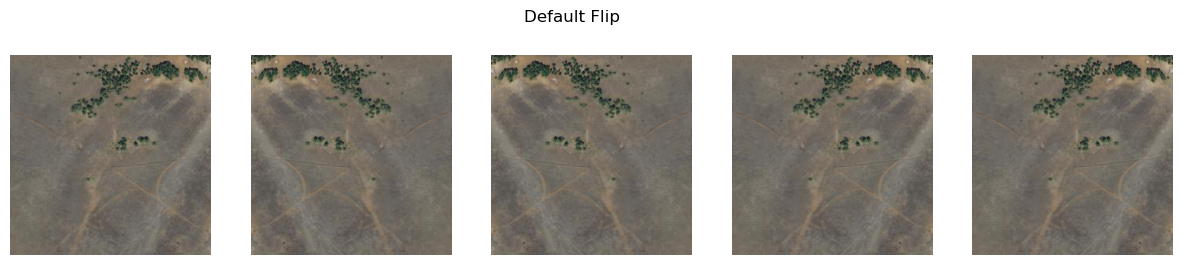

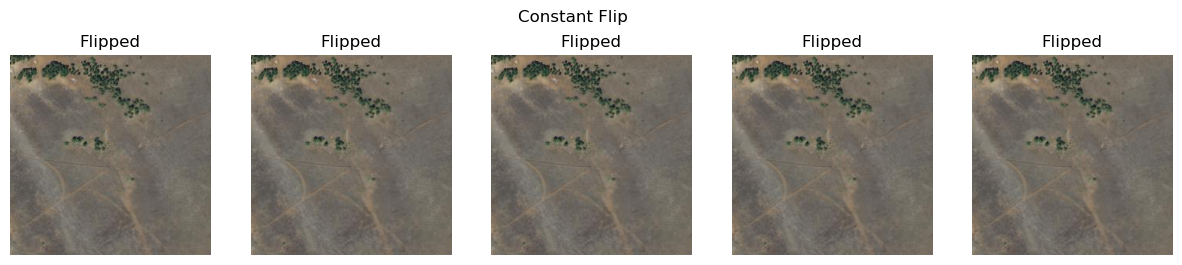

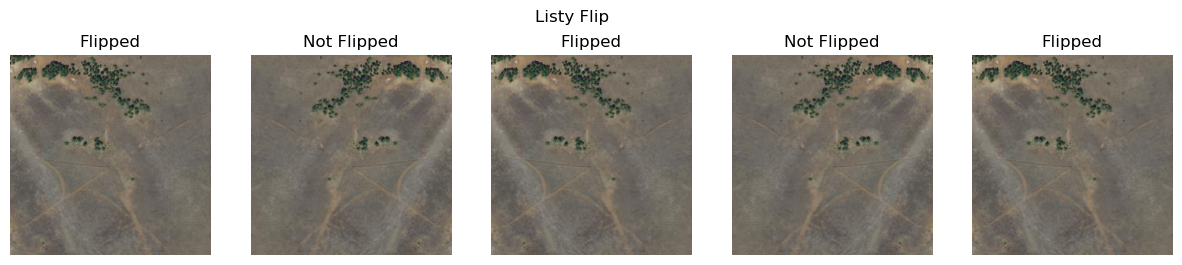

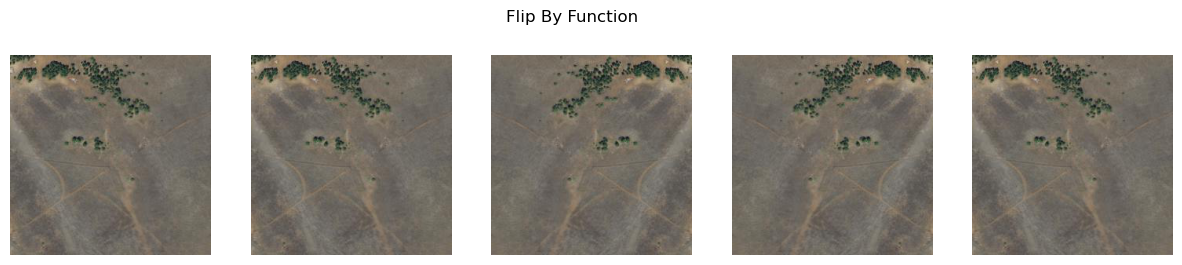

In [20]:
timg = TensorImage(array(img)).permute(2,0,1).float()/255.
def _batch_ex(bs): return TensorImage(timg[None].expand(bs, *timg.shape).clone())

with no_random(32):
    imgs = _batch_ex(5)
    deflt = Flip()
    const = Flip(p=1.,draw=1) #same as default
    listy = Flip(p=1.,draw=[1,0,1,0,1]) #completely manual!!!
    funct = Flip(draw=lambda x: torch.ones(x.size(0))) #same as default

    show_images( deflt(imgs) ,suptitle='Default Flip')
    show_images( const(imgs) ,suptitle='Constant Flip',titles=[f'Flipped' for i in['','','','','']]) #same above
    show_images( listy(imgs) ,suptitle='Listy Flip',titles=[f'{i}Flipped' for i in ['','Not ','','Not ','']])
    show_images( funct(imgs) ,suptitle='Flip By Function') #same as default

Calls` @patch`’d `dihedral_batch` behaviors for TensorImage, TensorMask, TensorPoint, and TensorBBox.

`draw` can be specified if you want to customize which flip is picked when the transform is applied (default is a random number between 0 and 7). It can be an integer between 0 and 7, a list of such integers (which then should have a length equal to or greater than the size of the batch) or a callable that returns a long tensor between 0 and 7.

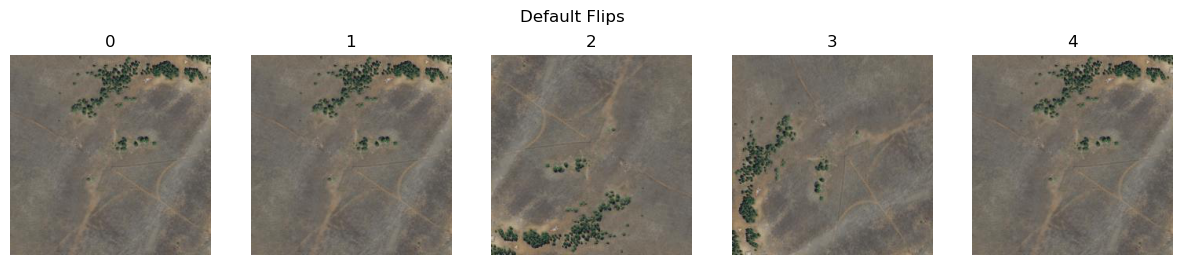

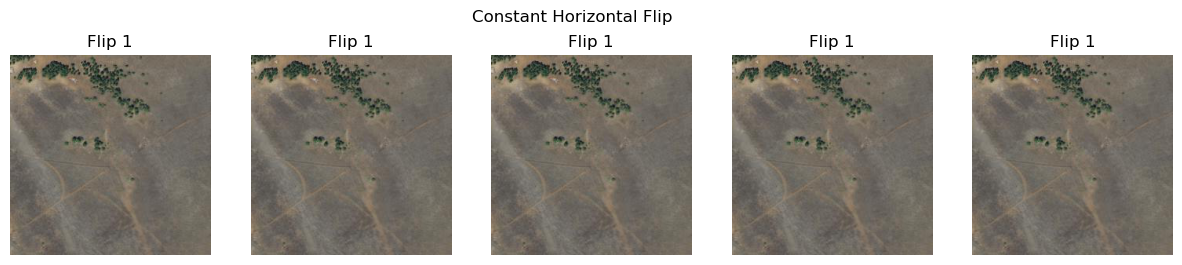

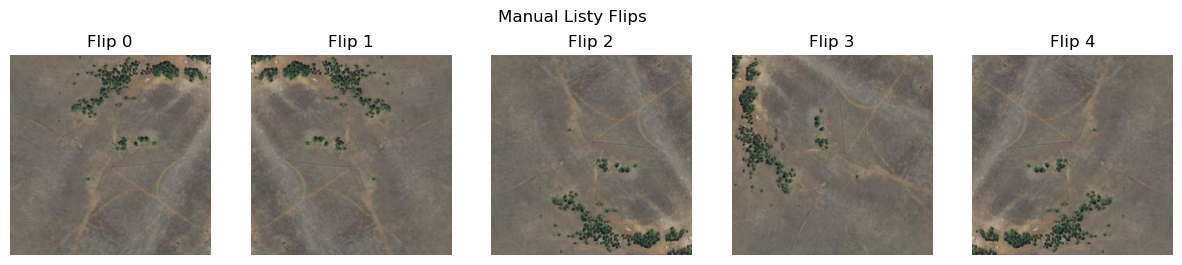

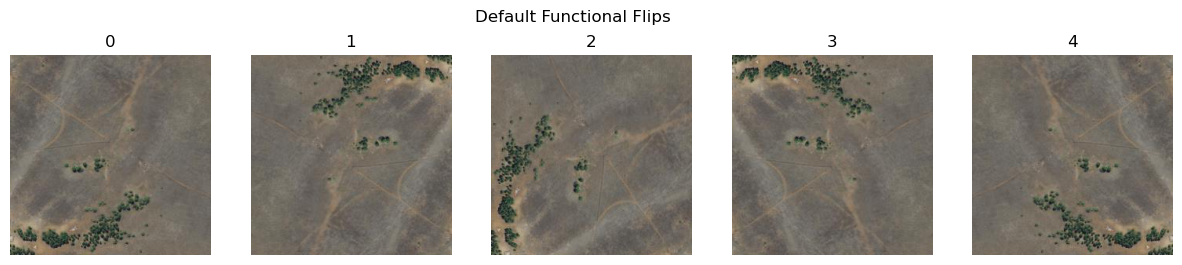

In [19]:
with no_random():
    imgs = _batch_ex(5)
    deflt = Dihedral()
    const = Dihedral(p=1.,draw=1) #same as flip_batch
    listy = Dihedral(p=1.,draw=[0,1,2,3,4]) #completely manual!!!
    funct = Dihedral(draw=lambda x: torch.randint(0,8,(x.size(0),))) #same as default

    show_images( deflt(imgs) ,suptitle='Default Flips',titles=[i for i in range(imgs.size(0))])
    show_images( const(imgs) ,suptitle='Constant Horizontal Flip',titles=[f'Flip 1' for i in [0,1,1,1,1]])
    show_images( listy(imgs) ,suptitle='Manual Listy Flips',titles=[f'Flip {i}' for i in [0,1,2,3,4]]) #manually specified, not random! 
    show_images( funct(imgs) ,suptitle='Default Functional Flips',titles=[i for i in range(imgs.size(0))]) #same as default

`draw` can be specified if you want to customize which angle is picked when the transform is applied (default is a random float between `-max_deg` and `max_deg`). It can be a float, a list of floats (which then should have a length equal to or greater than the size of the batch) or a callable that returns a float tensor.

Rotate by default can only rotate 10 degrees, which makes the changes harder to see. This is usually combined with either `flip` or `dihedral`, which make much larger changes by default. A rotate of 180 degrees is the same as a vertical flip for example.

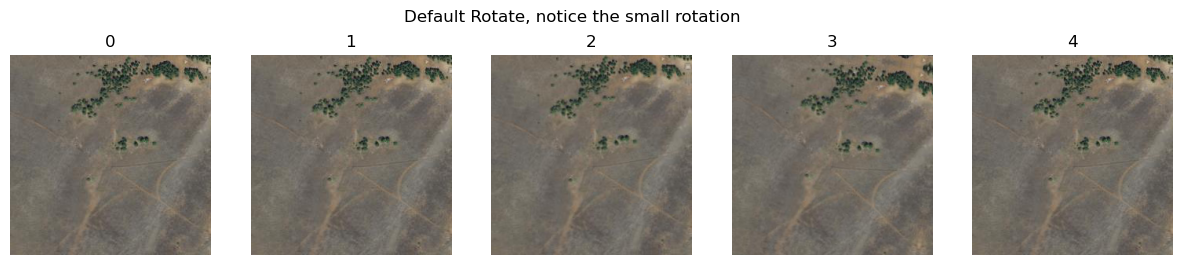

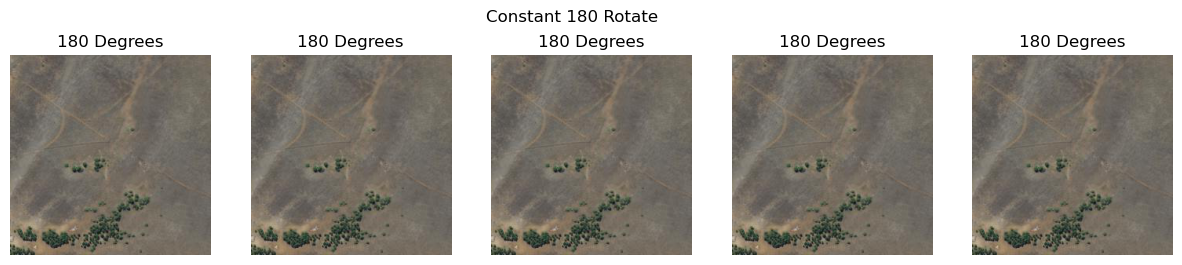

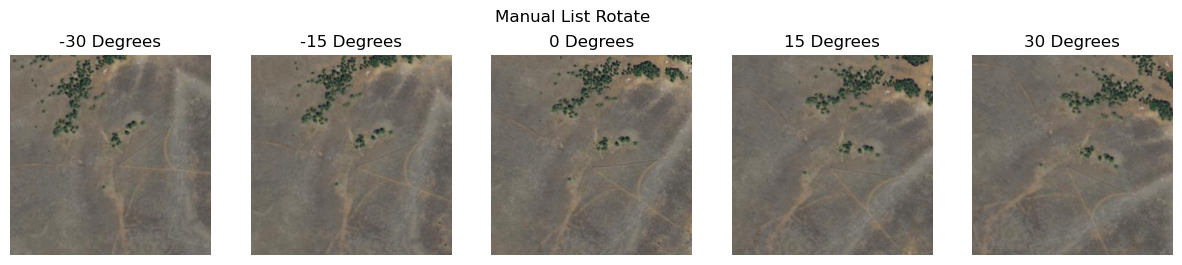

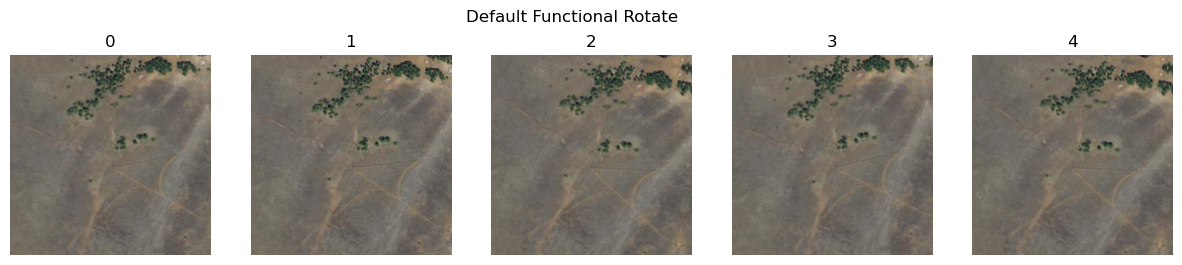

In [18]:
with no_random():
    thetas = [-30,-15,0,15,30]
    imgs = _batch_ex(5)
    deflt = Rotate()
    const = Rotate(p=1.,draw=180) #same as a vertical flip
    listy = Rotate(p=1.,draw=[-30,-15,0,15,30]) #completely manual!!!
    funct = Rotate(draw=lambda x: x.new_empty(x.size(0)).uniform_(-10, 10)) #same as default

    show_images( deflt(imgs) ,suptitle='Default Rotate, notice the small rotation',titles=[i for i in range(imgs.size(0))])
    show_images( const(imgs) ,suptitle='Constant 180 Rotate',titles=[f'180 Degrees' for i in range(imgs.size(0))])
    #manually specified, not random! 
    show_images( listy(imgs) ,suptitle='Manual List Rotate',titles=[f'{i} Degrees' for i in [-30,-15,0,15,30]])
    #same as default
    show_images( funct(imgs) ,suptitle='Default Functional Rotate',titles=[i for i in range(imgs.size(0))])